In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [79]:
import os
DATA_PATH = "Dane/USA/SP_500.csv"

In [80]:
data_stock = pd.read_csv(DATA_PATH, sep=",")

In [81]:
data_stock.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-30,1316.16,1316.16,1300.49,1313.01,2032783333
1,2012-01-31,1313.53,1321.41,1306.69,1312.41,2353083333
2,2012-02-01,1312.45,1330.52,1312.45,1324.09,2502422222
3,2012-02-02,1324.24,1329.19,1321.57,1325.54,2289400000
4,2012-02-03,1326.21,1345.34,1326.21,1344.90,2560305556


In [82]:
data_stock.describe()

,Open,High,Low,Close,Volume
count,1592.000000,1592.000000,1592.000000,1592.000000,1.592000e+03
mean,1983.254391,1991.843769,1974.077142,1983.754906,1.973925e+09
std,385.776016,386.468906,384.702618,385.463489,3.629619e+08
min,1277.820000,1282.550000,1266.740000,1278.040000,6.938667e+08
25%,1687.297500,1692.052500,1681.657500,1688.845000,1.762729e+09
50%,2018.305000,2026.790000,2005.280000,2019.180000,1.935067e+09
75%,2177.872500,2183.827500,2171.437500,2180.080000,2.129876e+09
max,2867.230000,2872.870000,2851.480000,2872.870000,4.220806e+09


In [83]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1592 non-null   object 
 1   Open    1592 non-null   float64
 2   High    1592 non-null   float64
 3   Low     1592 non-null   float64
 4   Close   1592 non-null   float64
 5   Volume  1592 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 74.8+ KB


Dodajmy kolumnę wskazującą czy podczas danej sesji kurs wzrósł czy zmalał

In [84]:
#1 - wzrósł
#0 - zmalał
data_stock['Increased'] = data_stock['Close']-data_stock['Open']
data_stock['Increased'] = data_stock['Increased'].map(lambda diff: 1 if diff > 0 else 0)

In [85]:
data_stock.head()

,Date,Open,High,Low,Close,Volume,Increased
0,2012-01-30,1316.16,1316.16,1300.49,1313.01,2032783333,0
1,2012-01-31,1313.53,1321.41,1306.69,1312.41,2353083333,0
2,2012-02-01,1312.45,1330.52,1312.45,1324.09,2502422222,1
3,2012-02-02,1324.24,1329.19,1321.57,1325.54,2289400000,1
4,2012-02-03,1326.21,1345.34,1326.21,1344.90,2560305556,1


Zróbmy wykres CLOSE w zależności od czasu

In [86]:
import matplotlib.pyplot as plt

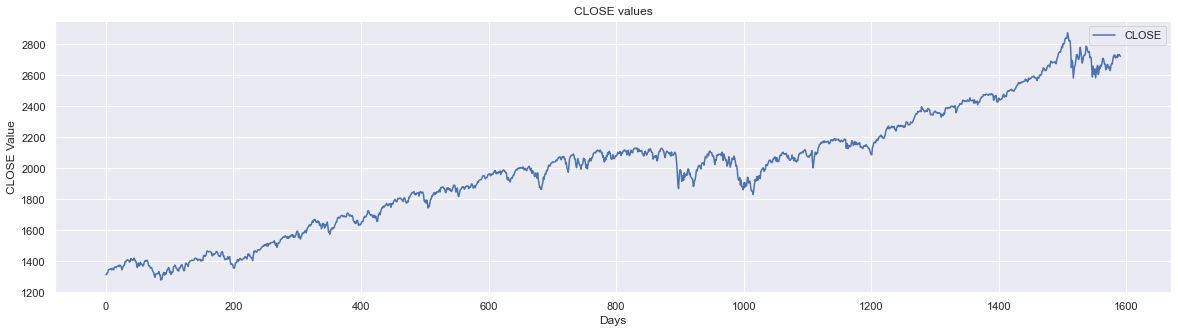

In [87]:
plt.subplots(figsize = (20, 5))
plt.plot(data_stock['Close'], label = 'CLOSE')
# plt.ylim([-0.004, 0.004])
# plt.xlim([0, 1660])
plt.ylabel('CLOSE Value')
plt.xlabel('Days')
plt.title('CLOSE values')
plt.legend()
plt.show()

Spójrzmy na wycinek dzienny (7 dni)

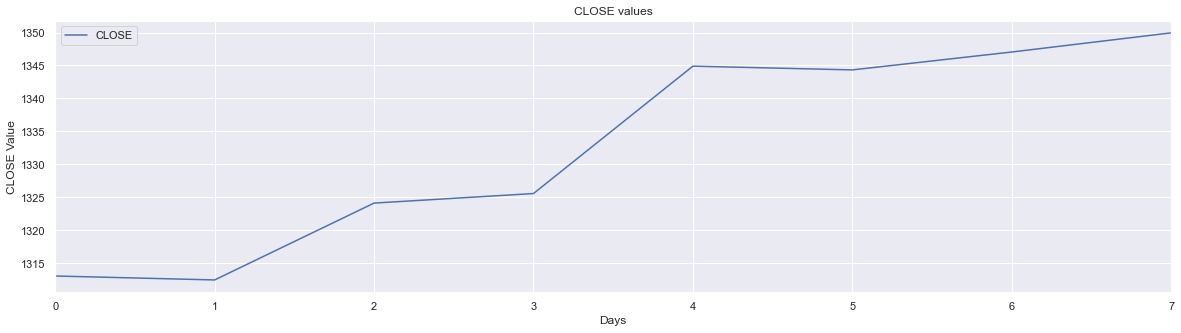

In [88]:
plt.subplots(figsize = (20, 5))
plt.plot(data_stock['Close'][:8], label = 'CLOSE')
plt.xlim([0, 7])
plt.ylabel('CLOSE Value')
plt.xlabel('Days')
plt.title('CLOSE values')
plt.legend()
plt.show()

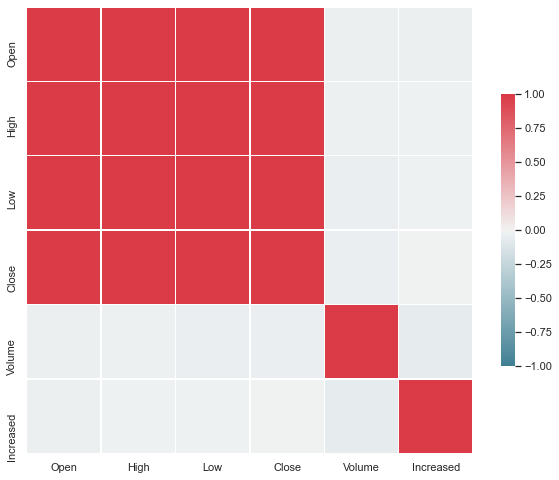

In [89]:
import seaborn as sns

# sns.set(style='darkgrid')

corr = data_stock.corr()
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={'shrink': .5}, ax=ax)
plt.show()

# Podzielenie danych na X i y

Będziemy próbowali przewidzieć czy kurs wzrośnie czy zmaleje podczas danej sesji

Wykorzystamy w tym celu kolumny VOL oraz inforację czy wtedy kurs wzrósł czy zmalał

Spróbujemy to zrobić wykorzystując **n poprzednich danych**

W tym celu utwórzmy kopię naszego dataframe *wig* aby móc dodać do niego dodatkowe kolumny wykorzystujące informacje z przeszłości

In [90]:
data_stock_modified = data_stock

In [91]:
data_stock_modified.head()

,Date,Open,High,Low,Close,Volume,Increased
0,2012-01-30,1316.16,1316.16,1300.49,1313.01,2032783333,0
1,2012-01-31,1313.53,1321.41,1306.69,1312.41,2353083333,0
2,2012-02-01,1312.45,1330.52,1312.45,1324.09,2502422222,1
3,2012-02-02,1324.24,1329.19,1321.57,1325.54,2289400000,1
4,2012-02-03,1326.21,1345.34,1326.21,1344.90,2560305556,1


Usuńmy n pierwszych wiersze z naszych danych, gdyż dla nich nie będziemy mieli danych z przeszłości

In [92]:
memory = 1

In [93]:
data_stock_modified = data_stock_modified[memory:]

In [94]:
for i in range (1, memory+1):
    data_stock_modified['Vol_'+str(i)+'_ago'] = np.array(data_stock['Volume'][memory-i:-i])
    data_stock_modified['Increased_'+str(i)+'_ago'] = np.array(data_stock['Increased'][memory-i:-i])

<ipython-input-94-a2f7d989ca09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock_modified['Vol_'+str(i)+'_ago'] = np.array(data_stock['Volume'][memory-i:-i])
<ipython-input-94-a2f7d989ca09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stock_modified['Increased_'+str(i)+'_ago'] = np.array(data_stock['Increased'][memory-i:-i])


In [95]:
data_stock_modified.head(6)

,Date,Open,High,Low,Close,Volume,Increased,Vol_1_ago,Increased_1_ago
1,2012-01-31,1313.53,1321.41,1306.69,1312.41,2353083333,0,2032783333,0
2,2012-02-01,1312.45,1330.52,1312.45,1324.09,2502422222,1,2353083333,0
3,2012-02-02,1324.24,1329.19,1321.57,1325.54,2289400000,1,2502422222,1
4,2012-02-03,1326.21,1345.34,1326.21,1344.90,2560305556,1,2289400000,1
5,2012-02-06,1344.32,1344.36,1337.52,1344.33,1877611111,1,2560305556,1
6,2012-02-07,1344.33,1349.24,1335.92,1347.05,2079144444,1,1877611111,1


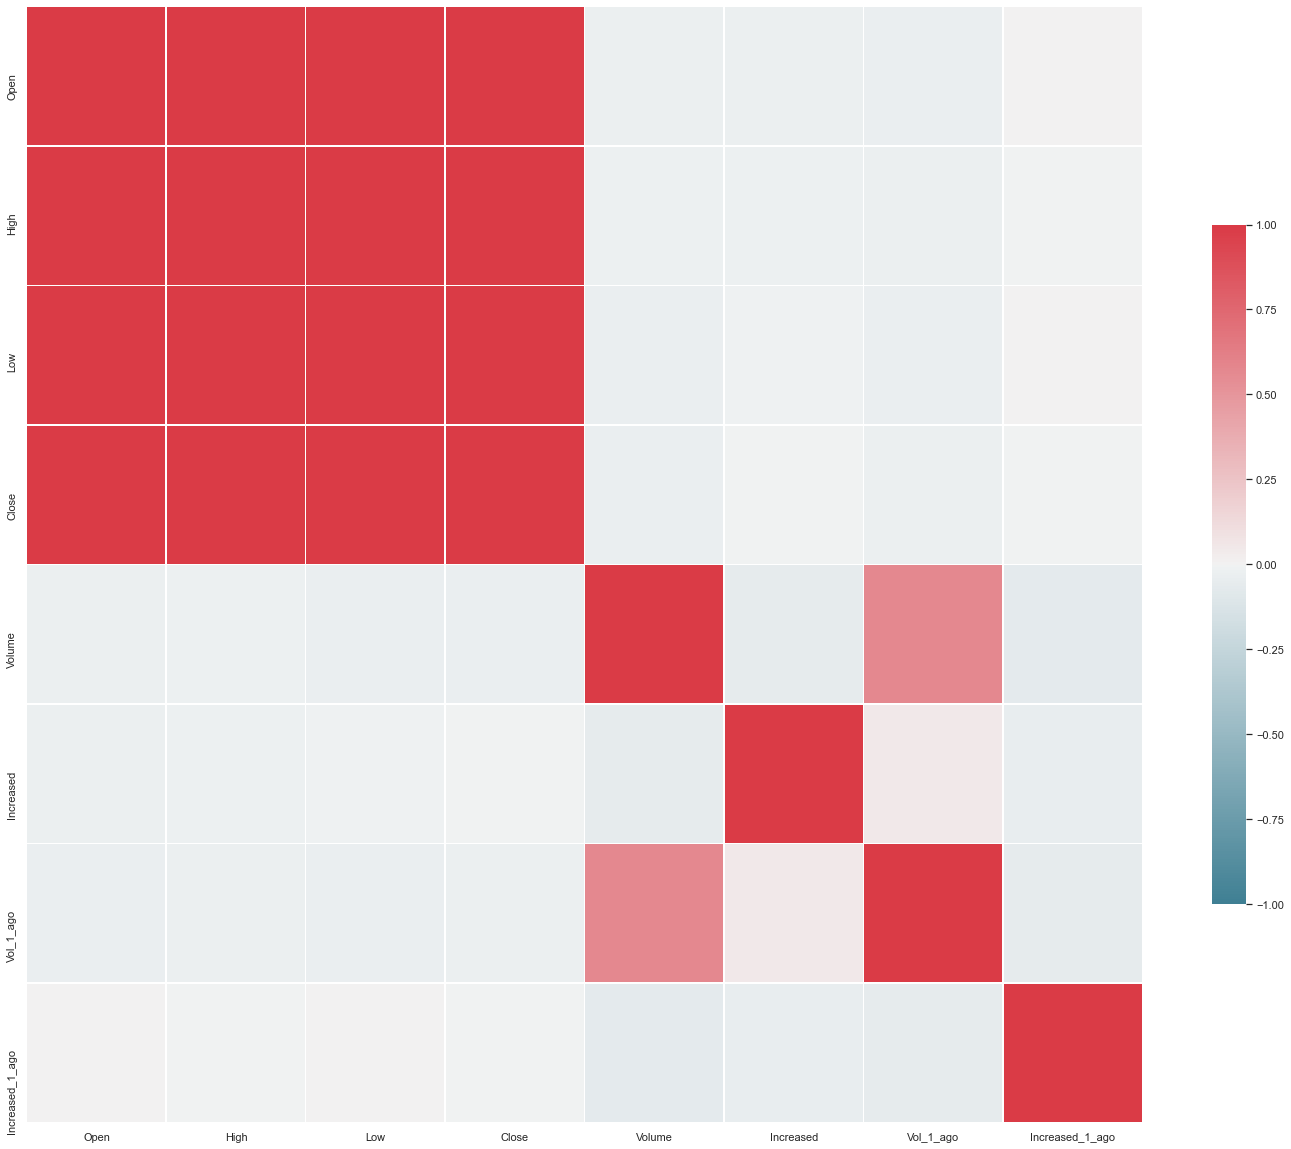

In [96]:
sns.set(style='darkgrid')

corr = data_stock_modified.corr()
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={'shrink': .5}, ax=ax)
plt.show()

**Możemy teraz utworzyć nasze zbiory X oraz y**

Wydzielamy zbiór wartości

In [97]:
y = data_stock_modified['Increased'].values

In [98]:
y

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

**Wydzielamy zbiór argumentów**

Usuwamy HIGH, LOW, CLOSE, VOL, gdyż są to dane z przyszłości

Usuwamy również OPEN gdyż w takiej obróbce mogłoby ono tylko zaciemnić dane

Ponadto usuwamy również DATE, gdyż nie wnoszą one aktualnie wartościowych informacji i mogą zniekształcić nasz model

In [99]:
X = data_stock_modified.drop(['High', 'Low', 'Close', 'Volume', 'Open', 'Date', 'Increased'], axis=1)

In [100]:
X.head(8)

,Vol_1_ago,Increased_1_ago
1,2032783333,0
2,2353083333,0
3,2502422222,1
4,2289400000,1
5,2560305556,1
6,1877611111,1
7,2079144444,1
8,2275961111,1


# Modele

In [101]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None, shuffle=False)

In [102]:
X_train

,Vol_1_ago,Increased_1_ago
22,2490205556,0
345,1877011111,1
5,2560305556,1
82,2187594444,1
891,1789611111,0
...,...,...
1558,1701644444,0
1532,2502205556,0
896,2179150000,0
1095,1912233333,1


**Skalowanie**

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
X_train.shape

(1272, 2)

In [105]:
y_train.shape

(1272,)

In [106]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

seed=123
# kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
kfold = StratifiedKFold(n_splits=5)

In [107]:
X_train

array([[ 1.4267716 , -1.08367845],
       [-0.2451538 ,  0.92278296],
       [ 1.61790505,  0.92278296],
       ...,
       [ 0.57865288, -1.08367845],
       [-0.1491175 ,  0.92278296],
       [-0.02961743,  0.92278296]])

In [ ]:
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
    ('classifier', LogisticRegression(max_iter=10000))])

param_grid = {
            'classifier__C' : np.linspace(0, 0.1, 100),
            'classifier__solver':['newton-cg', 'lbfgs', 'liblinear'],
            'classifier__penalty' : ['l1', 'l2']
}

grid_4 = GridSearchCV(pipe, param_grid, verbose=10,scoring='accuracy')
grid_4.fit(X_train, y_train)
grid_4.best_params_

In [109]:
from sklearn import  metrics
metrics.accuracy_score(y_test, grid_4.predict(X_test))

0.5517241379310345

In [110]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.callbacks import History

history_sgd = History()
model = Sequential()

model.add(Flatten(input_shape=((X_train).shape[1],)))

model.add(Dense(300))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dropout(0.3))

model.add(Dense(150))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dropout(0.3))

model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dropout(0.3))

model.add(Dense(1,activation="sigmoid"))



model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               900       
_________________________________________________________________
batch_normalization_6 (Batch (None, 300)               1200      
_________________________________________________________________
activation_6 (Activation)    (None, 300)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 150)               45150     
_________________________________________________________________
batch_normalization_7 (Batch (None, 150)              

In [111]:
model.compile(loss="binary_crossentropy",optimizer='adam', metrics=["accuracy"])

In [112]:
model.fit(X_train, y_train, batch_size=32,epochs=200, validation_data=(X_test, y_test), callbacks=[history_sgd])

Epoch 1/200
40/40 [==============================] - 0s 7ms/step - loss: 0.8367 - accuracy: 0.5079 - val_loss: 0.6916 - val_accuracy: 0.4984
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7700 - accuracy: 0.5118 - val_loss: 0.6892 - val_accuracy: 0.5486
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7646 - accuracy: 0.5149 - val_loss: 0.6880 - val_accuracy: 0.5549
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7697 - accuracy: 0.5212 - val_loss: 0.6876 - val_accuracy: 0.5580
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7448 - accuracy: 0.5181 - val_loss: 0.6879 - val_accuracy: 0.5580
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7458 - accuracy: 0.5157 - val_loss: 0.6882 - val_accuracy: 0.5486
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7493 - accuracy: 0.4937 - val_loss: 0.6953 - val_accuracy: 0.4922
Epoch 8/200
4

Epoch 59/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5031 - val_loss: 0.6923 - val_accuracy: 0.5078
Epoch 60/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5393 - val_loss: 0.6905 - val_accuracy: 0.5580
Epoch 61/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5393 - val_loss: 0.6920 - val_accuracy: 0.5204
Epoch 62/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5527 - val_loss: 0.6926 - val_accuracy: 0.5172
Epoch 63/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5291 - val_loss: 0.6909 - val_accuracy: 0.5580
Epoch 64/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5267 - val_loss: 0.6906 - val_accuracy: 0.5549
Epoch 65/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5448 - val_loss: 0.6922 - val_accuracy: 0.5016
Epoch 

40/40 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5377 - val_loss: 0.6917 - val_accuracy: 0.5549
Epoch 174/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5456 - val_loss: 0.6930 - val_accuracy: 0.5110
Epoch 175/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5448 - val_loss: 0.6924 - val_accuracy: 0.5517
Epoch 176/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5385 - val_loss: 0.6936 - val_accuracy: 0.5016
Epoch 177/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5464 - val_loss: 0.6935 - val_accuracy: 0.5078
Epoch 178/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5464 - val_loss: 0.6921 - val_accuracy: 0.5110
Epoch 179/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5464 - val_loss: 0.6931 - val_accuracy: 0.5016
Epoch 180/200

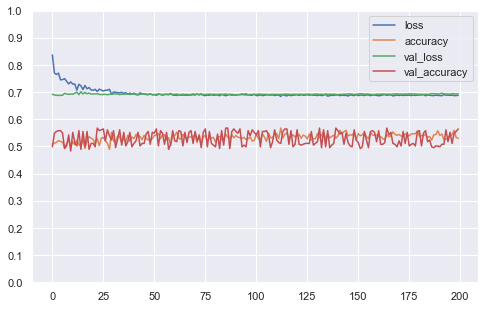

In [113]:
import pandas as pd

pd.DataFrame(history_sgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.yticks(np.linspace(0,1,11))
plt.show()

# Krzywe ROC

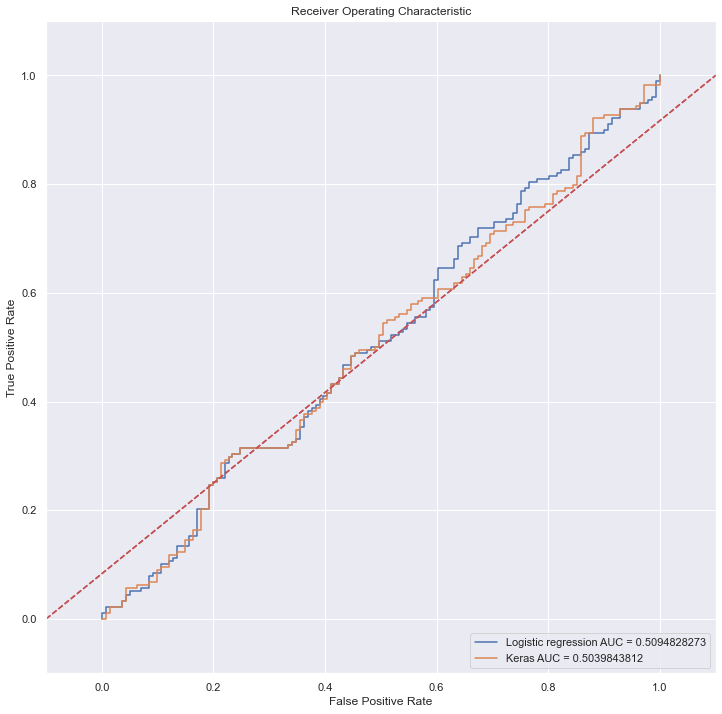

In [114]:
models = []
models.append(('Logistic regression', grid_4))
models.append(('Keras', model))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_val = []
plt.figure(figsize=(12, 12))
for name, model in models:
    if((name == 'Keras')):
        precision_score.append(metrics.precision_score(y_test, model.predict_classes(X_test)))
        recall_score.append(metrics.recall_score(y_test, model.predict_classes(X_test)))
        f1_score.append( metrics.f1_score(y_test, model.predict_classes(X_test)))
        accuracy_score.append(metrics.accuracy_score(y_test, model.predict_classes(X_test)))
        
        
        # calculate the fpr and tpr for all thresholds of the classification
        probs = model.predict_proba(X_test)
        preds = probs
        fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
        roc_auc = metrics.auc(fpr, tpr)
        roc_auc_val.append(roc_auc)
        
    else:
        precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
        recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
        f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
        accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))
        
        # calculate the fpr and tpr for all thresholds of the classification
        probs = model.predict_proba(X_test)
        preds = probs[:,1]
        fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
        roc_auc = metrics.auc(fpr, tpr)
        roc_auc_val.append(roc_auc)
            

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = '%s AUC = %0.10f' % (name, roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([-0.1, 1.1], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.rcParams['figure.figsize'] = [2, 2]
plt.show()

In [115]:
d = {
     'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc': roc_auc_val
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=[model[0] for model in models])
df.sort_values(by='accuracy_score', ascending=False)

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc
1,Keras,0.567474,0.921348,0.702355,0.564263,0.503984
0,Logistic regression,0.558923,0.932584,0.698947,0.551724,0.509483
